## Logistic Regression:

Classifying with supervised learning whether diabetic patients are readmitted, and if they are, if it's before or after 30 days.

Using the dataset from here: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [1]:
import pandas as pd
import patsy as patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pickle

In [2]:
with open("x_liv.pkl", 'rb') as picklefile: 
    x_liv = pickle.load(picklefile)

with open("y_liv.pkl", 'rb') as picklefile: 
    y_liv = pickle.load(picklefile)

In [3]:
with open("y_train_liv.pkl", 'rb') as picklefile: 
    y_train_liv = pickle.load(picklefile)

with open("y_test_liv.pkl", 'rb') as picklefile: 
    y_test_liv = pickle.load(picklefile)

with open("x_train_liv.pkl", 'rb') as picklefile: 
    x_train_liv = pickle.load(picklefile)

with open("x_test_liv.pkl", 'rb') as picklefile: 
    x_test_liv = pickle.load(picklefile)

with open("x_train_scaled_liv.pkl", 'rb') as picklefile: 
    x_train_scaled_liv = pickle.load(picklefile)

with open("x_test_scaled_liv.pkl", 'rb') as picklefile: 
    x_test_scaled_liv = pickle.load(picklefile)
    
with open("x_scaled_liv.pkl", 'rb') as picklefile: 
    x_scaled_liv = pickle.load(picklefile)

with open("patientdataICD9_liv.pkl", 'rb') as picklefile: 
    patientdataICD9_liv = pickle.load(picklefile)

In [4]:
# using the scaled x-train and x-test because it's Logistic
x_train = x_train_scaled_liv
y_train = y_train_liv
x_test = x_test_scaled_liv
y_test = y_test_liv
x = x_scaled_liv
y = y_liv

In [5]:
y = y.str.replace('>30','NO')
y_test = y_test.str.replace('>30','NO')
y_train = y_train.str.replace('>30','NO')

#### Logistic regression with test/train split (25% for test):

In [6]:
# this is being pulled in from pickle

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [7]:
lrmodel = linear_model.LogisticRegression(class_weight="balanced")
lrmodel.fit(x_train,y_train)
#lrmodel.score(x_test,y_test)

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [8]:
# This code achieves the same thing as lrmodel.score(x_test,y_test)

# Predict on test
y_pred = lrmodel.predict(x_test)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.670
              precision    recall  f1-score   support

         <30       0.19      0.57      0.28      2839
          NO       0.93      0.68      0.79     22190

   micro avg       0.67      0.67      0.67     25029
   macro avg       0.56      0.63      0.53     25029
weighted avg       0.84      0.67      0.73     25029



#### Logistic regression with cross-validation:

In [9]:
# 10-fold cross-validation with logistic regression
# stratifying the Kfold splits is default in CV
# returning the average score
print(cross_val_score(lrmodel, x, y, cv=10, scoring='accuracy').mean())

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

0.6647117844201343


In [10]:
y_test.unique()

array(['NO', '<30'], dtype=object)

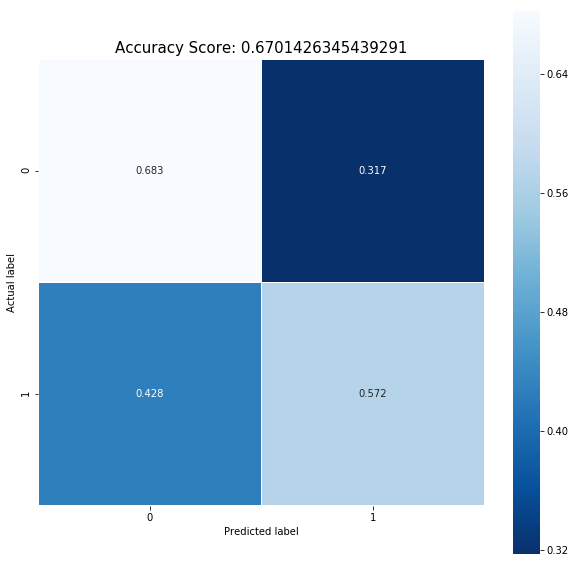

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=list(y_test.unique()))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [12]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[0.68273997, 0.31726003],
       [0.42831983, 0.57168017]])

In [13]:
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.670
              precision    recall  f1-score   support

         <30       0.19      0.57      0.28      2839
          NO       0.93      0.68      0.79     22190

   micro avg       0.67      0.67      0.67     25029
   macro avg       0.56      0.63      0.53     25029
weighted avg       0.84      0.67      0.73     25029



In [14]:
lrmodel.coef_.shape

(1, 266)

#### Get the coefficients:

In [15]:
coefficients = pd.DataFrame({"Feature":x.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

In [16]:
coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

In [17]:
coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Feature,Coefficients,abs_val_coef
101,medical_specialty[T.Gynecology],1.957913,1.957913
48,discharge_disposition_id[T.Hospice / home],1.630565,1.630565
31,admission_type_id[T.Trauma Center],1.491878,1.491878
125,medical_specialty[T.Pediatrics-Endocrinology],1.459365,1.459365
197,"diag_3[T.Complications Of Pregnancy, Childbirt...",1.409893,1.409893
226,nateglinide[T.Up],1.402405,1.402405
178,"diag_2[T.Complications Of Pregnancy, Childbirt...",1.396040,1.396040
47,discharge_disposition_id[T.Discharged/transfer...,1.285026,1.285026
46,discharge_disposition_id[T.Discharged/transfer...,1.253044,1.253044
118,medical_specialty[T.Otolaryngology],1.249411,1.249411


#### Grid search Logistic Regression:

In [18]:
# list(np.arange(0.0, 10.0, 0.1))

In [19]:
# define the parameter values that should be searched
C_range = list(np.arange(0.1, 1.0, 0.1))

# Logistic regression defaults to L2 normalization

# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(C=C_range)

# instantiate the grid
grid = GridSearchCV(lrmodel, param_grid, cv=10, scoring='accuracy')

In [20]:
# fit the grid with data 
grid.fit(x, y);

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

In [22]:
# view the complete results (list of named tuples)
# grid.grid_scores_ # old name for this function
grid.cv_results_

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/etheredge

{'mean_fit_time': array([3.13368533, 3.9084465 , 4.66947799, 5.12036819, 5.3338501 ,
        5.73264813, 6.05736325, 6.15016835, 6.393542  ]),
 'std_fit_time': array([0.14078184, 0.18687381, 0.36905963, 0.22160837, 0.48063633,
        0.38302074, 0.33795358, 0.51682644, 0.50022176]),
 'mean_score_time': array([0.02872579, 0.02783659, 0.02835591, 0.02858181, 0.03074024,
        0.02976367, 0.03030126, 0.02763174, 0.02894156]),
 'std_score_time': array([0.00211639, 0.00268322, 0.0018537 , 0.0019608 , 0.00351072,
        0.00351055, 0.00330914, 0.00254475, 0.00174134]),
 'param_C': masked_array(data=[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                    0.7000000000000001, 0.8, 0.9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1},
  {'C': 0.2},
  {'C': 0.30000000000000004},
  {'C': 0.4},
  {'C': 0.5},
  {'C': 0.6},
  {'C': 0.7000000000000001},
  {

In [23]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6654813512595641
{'C': 0.1}
LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


#### Using GridSearchCV, I found that a lower C than default performs better, but trivially so
0.581 for C=0.1 vs 0.578 for C=1

#### Random undersampling:

In [24]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

In [25]:
lrmodel.fit(x_train_undersampled, y_train_undersampled)

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [26]:
# Predict on test
y_pred = lrmodel.predict(x_test)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.663
              precision    recall  f1-score   support

         <30       0.19      0.58      0.28      2839
          NO       0.93      0.67      0.78     22190

   micro avg       0.66      0.66      0.66     25029
   macro avg       0.56      0.63      0.53     25029
weighted avg       0.84      0.66      0.72     25029



Text(0.5, 1.0, 'Precision Recall Curve')

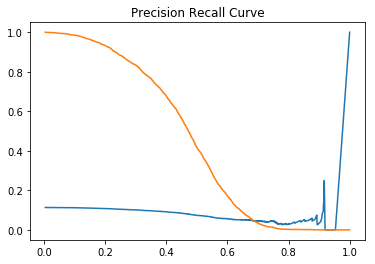

In [27]:
from sklearn.metrics import precision_recall_curve

y_test_num = y_test.copy()
y_test_num = y_test_num.replace('NO', 0)
y_test_num = y_test_num.replace('<30', 1)

model = lrmodel

y_score = model.predict_proba(x_test)[:, 1]
p, r, t = precision_recall_curve(y_test_num, y_score)

# adding last threshold of '1' to threshold list
t = np.vstack([t.reshape([-1, 1]), 1])

plt.plot(t, p)
plt.plot(t, r)
plt.title('Precision Recall Curve')
# yellow = recall
# blue = precision

In [28]:
# define the parameter values that should be searched
C_range = list(np.arange(0.1, 1.0, 0.1))

# Logistic regression defaults to L2 normalization

# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(C=C_range)

# instantiate the grid
grid = GridSearchCV(lrmodel, param_grid, cv=3, scoring='recall_micro')

In [29]:
x_scaled_undersampled, y_undersampled = rus.fit_sample(x_scaled_liv, y)

In [30]:
# fit the grid with data 
grid.fit(x_scaled_undersampled, y_undersampled);

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

In [31]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.4871885180945672
{'C': 0.1}
LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [32]:
lrmodel = linear_model.LogisticRegression(C=0.1)
lrmodel.fit(x_train_undersampled, y_train_undersampled)
# Predict on test
y_pred = lrmodel.predict(x_test)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.666
              precision    recall  f1-score   support

         <30       0.19      0.58      0.28      2839
          NO       0.93      0.68      0.78     22190

   micro avg       0.67      0.67      0.67     25029
   macro avg       0.56      0.63      0.53     25029
weighted avg       0.84      0.67      0.73     25029



#### Get the coefficients:

In [33]:
coefficients = pd.DataFrame({"Feature":x.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

In [34]:
coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

In [35]:
coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Feature,Coefficients,abs_val_coef
40,discharge_disposition_id[T.Discharged/transfer...,-0.963386,0.963386
48,discharge_disposition_id[T.Hospice / home],0.706194,0.706194
36,discharge_disposition_id[T.Discharged/transfer...,-0.641091,0.641091
42,discharge_disposition_id[T.Discharged/transfer...,-0.625198,0.625198
49,discharge_disposition_id[T.Hospice / medical f...,0.508545,0.508545
37,discharge_disposition_id[T.Discharged/transfer...,0.467064,0.467064
45,discharge_disposition_id[T.Discharged/transfer...,-0.407129,0.407129
33,discharge_disposition_id[T.Discharged to home],0.401116,0.401116
148,medical_specialty[T.Surgery-Cardiovascular/Tho...,0.386873,0.386873
125,medical_specialty[T.Pediatrics-Endocrinology],0.381817,0.381817


#### Polynomial features:

In [40]:
poly = preprocessing.PolynomialFeatures(2, interaction_only=True)
x_train_poly_undersampled = poly.fit_transform(x_train_undersampled)

In [41]:
x_train_poly_undersampled.shape

(17036, 35512)

In [42]:
x_test_poly_undersampled = poly.transform(x_test)

In [43]:
lrmodel = linear_model.LogisticRegression(C=0.01)

lrmodel.fit(x_train_poly_undersampled, y_train_undersampled)

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
# Predict on test
y_pred = lrmodel.predict(x_test_poly_undersampled)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.634
              precision    recall  f1-score   support

         <30       0.17      0.59      0.27      2839
          NO       0.92      0.64      0.76     22190

   micro avg       0.63      0.63      0.63     25029
   macro avg       0.55      0.61      0.51     25029
weighted avg       0.84      0.63      0.70     25029



In [45]:
storelrmodel = lrmodel

#### Get the coefficients:

In [53]:
#### Get the coefficients:

coefficients = pd.DataFrame({"Feature":list(poly.get_feature_names(x.columns)),
                             "Coefficients":np.transpose(lrmodel.coef_[0,])})

coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Feature,Coefficients,abs_val_coef
10528,discharge_disposition_id[T.Discharged/transfer...,-0.206048,0.206048
17931,payer_code[T.HM] number_emergency,-0.173439,0.173439
11103,discharge_disposition_id[T.Discharged/transfer...,0.160048,0.160048
17961,payer_code[T.MC] medical_specialty[T.InternalM...,0.156081,0.156081
10434,discharge_disposition_id[T.Discharged/transfer...,0.148862,0.148862
8989,discharge_disposition_id[T.Discharged/transfer...,0.143994,0.143994
30655,diag_1[T.Diseases Of The Genitourinary System]...,-0.140854,0.140854
8309,admission_type_id[T.Urgent] medical_specialty[...,0.133702,0.133702
10530,discharge_disposition_id[T.Discharged/transfer...,0.133012,0.133012
8430,admission_type_id[T.Urgent] diag_3[T.Supplemen...,-0.129328,0.129328


#### Logistic with SMOTE:

In [54]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

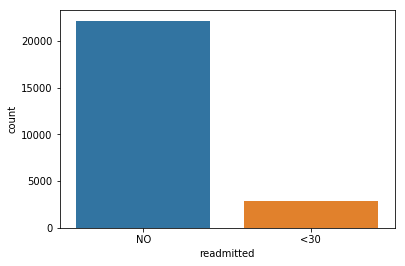

In [56]:
sns.countplot(y_test)

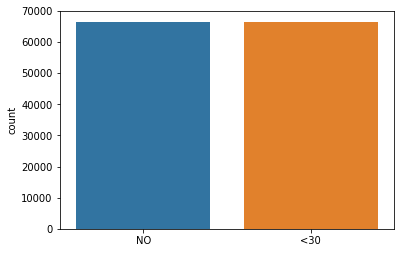

In [55]:
sns.countplot(y_train_smote)

In [57]:
lrmodel = linear_model.LogisticRegression(C=1)
lrmodel.fit(x_train_smote, y_train_smote)

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
# Predict on test
y_pred = lrmodel.predict(x_test)

In [59]:
# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

# recall @ C = 0.1: ?, ?, ?

Accuracy: 0.644
              precision    recall  f1-score   support

         <30       0.18      0.58      0.27      2839
          NO       0.92      0.65      0.77     22190

   micro avg       0.64      0.64      0.64     25029
   macro avg       0.55      0.61      0.52     25029
weighted avg       0.84      0.64      0.71     25029



In [60]:
#### Get the coefficients:

coefficients = pd.DataFrame({"Feature":x.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Feature,Coefficients,abs_val_coef
101,medical_specialty[T.Gynecology],2.383538,2.383538
178,"diag_2[T.Complications Of Pregnancy, Childbirt...",2.204952,2.204952
48,discharge_disposition_id[T.Hospice / home],2.115277,2.115277
197,"diag_3[T.Complications Of Pregnancy, Childbirt...",1.881075,1.881075
125,medical_specialty[T.Pediatrics-Endocrinology],1.815294,1.815294
31,admission_type_id[T.Trauma Center],1.809260,1.809260
118,medical_specialty[T.Otolaryngology],1.807398,1.807398
45,discharge_disposition_id[T.Discharged/transfer...,-1.663501,1.663501
226,nateglinide[T.Up],1.579806,1.579806
47,discharge_disposition_id[T.Discharged/transfer...,1.526593,1.526593
